<a href="https://colab.research.google.com/github/jay24rajput/Titanic-Prediction/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jay24rajput","key":"0224c5427d13a22c9a64d0cfb2baafa0"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge            COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-05-27 21:50:10          71785  
roche-data-science-coalition/uncover                         UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          10483  
rmjacobsen/property-listings-for-5-south-american-countries  Property Listings for 5 South American Countries    475MB  2020-05-25 02:05:38              1  
ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney     TV shows on Netflix, Prime Video, Hulu and Disney+   88KB  2020-05-25 15:38:39             12  
gomes555/road-transport-brazil                            

In [4]:
! kaggle competitions download -c 'titanic'

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 6.27MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 60.5MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.5MB/s]


In [0]:
import numpy as np
import pandas as pd

##Load the Data frames into Memory

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
passenger_id_test = df_test['PassengerId'].values
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##Delete all unnecessary columns from the dataframe

In [0]:
def deletecolumns(df,columns):
  df = df.drop(columns, axis = 1)
  return df

# List of columns that do to contribute to the output  
columns = ['PassengerId','Name','Ticket','Fare','Cabin','Embarked']

#Call function for deleting the columns
df_train = deletecolumns(df_train, columns)
df_test = deletecolumns(df_test, columns)


In [8]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [9]:
df_test

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


##Convert Sex to from Male - Female to Binary

```
Male - 0
Female - 1
```



In [0]:
from sklearn.preprocessing import LabelEncoder
def sex_to_binary(df):
  label_encoder = LabelEncoder()
  label_encoder.fit(['male','female'])
  df['Sex'] = label_encoder.transform(df['Sex'])
  return df

#Function call for test and train set
df_train = sex_to_binary(df_train)
df_test = sex_to_binary(df_test)

In [11]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,NaN,1,2
889,1,1,1,26.0,0,0


In [12]:
df_test

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
413,3,1,NaN,0,0
414,1,0,39.0,0,0
415,3,1,38.5,0,0
416,3,1,NaN,0,0


##Remove NaN values in All Column and Replace it with average of Non-Nan Rows

In [0]:
from sklearn.impute import SimpleImputer

def fill_missing_values(data,column_names):
  for column in column_names:
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data

columns = ['Age','SibSp','Parch']
df_test = fill_missing_values(df_test,columns)
df_train = fill_missing_values(df_train, columns)

In [14]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [15]:
df_test

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.50000,0,0
1,3,0,47.00000,1,0
2,2,1,62.00000,0,0
3,3,1,27.00000,0,0
4,3,0,22.00000,1,1
...,...,...,...,...,...
413,3,1,30.27259,0,0
414,1,0,39.00000,0,0
415,3,1,38.50000,0,0
416,3,1,30.27259,0,0


##Use OneHotEncoder on Pclass and categorize it into 3 columns each or a class

In [0]:
from sklearn.preprocessing import OneHotEncoder

def categorize(data):
  modified = pd.get_dummies(data["Pclass"],prefix='Pclass')
  data = data.join(modified)
  data = data.drop('Pclass', axis = 1)
  return data


df_train = categorize(df_train)

In [0]:
df_test = categorize(df_test)

In [18]:
df_test

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,34.50000,0,0,0,0,1
1,0,47.00000,1,0,0,0,1
2,1,62.00000,0,0,0,1,0
3,1,27.00000,0,0,0,0,1
4,0,22.00000,1,1,0,0,1
...,...,...,...,...,...,...,...
413,1,30.27259,0,0,0,0,1
414,0,39.00000,0,0,1,0,0
415,1,38.50000,0,0,0,0,1
416,1,30.27259,0,0,0,0,1


In [19]:
df_train

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,0,0,1
1,1,0,38.000000,1,0,1,0,0
2,1,0,26.000000,0,0,0,0,1
3,1,0,35.000000,1,0,1,0,0
4,0,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,0,1,0
887,1,0,19.000000,0,0,1,0,0
888,0,0,29.699118,1,2,0,0,1
889,1,1,26.000000,0,0,1,0,0


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
y = df_train['Survived']
df_train = df_train.drop('Survived', axis= 1)

In [22]:
df_train

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,22.000000,1,0,0,0,1
1,0,38.000000,1,0,1,0,0
2,0,26.000000,0,0,0,0,1
3,0,35.000000,1,0,1,0,0
4,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...
886,1,27.000000,0,0,0,1,0
887,0,19.000000,0,0,1,0,0
888,0,29.699118,1,2,0,0,1
889,1,26.000000,0,0,1,0,0


In [0]:
x_train, x_ver, y_train, y_var = train_test_split(df_train,y,test_size = 0.25,random_state = 42)

##Predict result using Random Forest Classifier

In [24]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf.score(x_ver,y_var)

0.8071748878923767

In [0]:
y_predict = rf.predict(df_test)

In [27]:
y_predict

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,

##Transform the results into CSV format for submission

In [0]:
def create_submission_csv(column, prediction):
  data = pd.DataFrame()
  data['PassengerId'] = column.T
  data['Survived'] = prediction
  data.to_csv('submission.csv', index = False)

In [0]:
create_submission_csv(passenger_id_test, y_predict.T)

##Train the data on custom Model made in keras



In [0]:
import tensorflow as tf
from tensorflow import keras

In [31]:
x_train.shape

(668, 7)

Add callbacks for stopping the training once the desired accuracy is reached

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if((logs.get('accuracy') > 0.83) and (logs.get('val_accuracy') > 0.81)):
           print("\nReached the desired accuracy! Stopping training\n")
           self.model.stop_training = True
            
callbacks = myCallback()

In [0]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Dense(16, activation= 'relu', input_dim = x_train.shape[1]),
         tf.keras.layers.Dense(32, activation='relu'),
         tf.keras.layers.Dense(64, activation='relu'),
         tf.keras.layers.Dense(1, activation = 'sigmoid')                           
])

Compile the Model



In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fit the model to the given data

In [55]:
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    validation_data = (x_ver,y_var),
    callbacks = [callbacks]
    )

Epoch 1/100
21/21 [==============================] - 0s 8ms/step - loss: 0.6769 - accuracy: 0.6168 - val_loss: 0.6733 - val_accuracy: 0.5964
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.6302 - val_loss: 0.6562 - val_accuracy: 0.6009
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6302 - val_loss: 0.6498 - val_accuracy: 0.6009
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.6347 - val_loss: 0.6292 - val_accuracy: 0.6099
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6512 - val_loss: 0.6126 - val_accuracy: 0.6323
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.6931 - val_loss: 0.5754 - val_accuracy: 0.6637
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5724 - accuracy: 0.7051 - val_loss: 0.5363 - val_accuracy: 0.7534
Epoch 8/100
2

##Train vs Validation Accuracy Graph

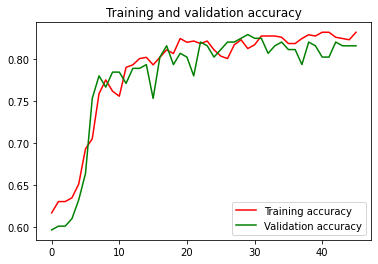

<Figure size 432x288 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

##Train vs Validation Loss Graph

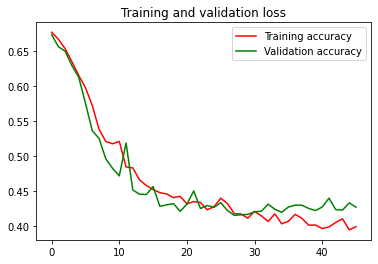

<Figure size 432x288 with 0 Axes>

In [57]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'g', label='Validation accuracy')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
test_prediction = model.predict_classes(df_test)

##Create the final Submission 

In [0]:
create_submission_csv(passenger_id_test, test_prediction)